# Proyecto Primer módulo 

## Programación lineal


Un inversionista quiere invertir $84,000$ dólares en diferentes acciones los cuales son; AAPL, AMZN y MSFT. Cuantas acciones de AAPL, AMZN Y MSFT debería de comprar para maximizar su portafolio si se tiene un máximo capital para invertir de 84,000 dólares. Cabe mencionar que AAPL tiene una tasa del $4\%$, MSFT $3\%$ y AMZN $5\%$. Al final como inversionistas, dejamos como máximo invertir un $20\%$ en AMZN debido a que es la más vólatil de las 3 mencionadas con anterioridad y se invertira el doble en AAPL que en MSFT debido a un análisis técnico y fundamental realizado con anterioridad el cual nos da los indicadores que AAPL crecerá. Una de las restricciones es que se tiene un limite de invertir el 50% del captial por cada empresa. Cuanto debemos invertir en cada empresa para maximizar la utilidad de nuestro portafolio 

In [73]:
import numpy as np 
import scipy.optimize as opt

In [89]:
# Matrices
c = -np.array([.04,.03,.05])

# Restricciones de desigualdad
A = np.array([[0,0,1]])

b = np.array([.20*84000])

# Restricción de igualdad
A_eq = np.array([[1,1,1]]) 
b_eq = 84000

# Límites (bounds)
bounds = (0,84000*.50)

# Resolver
sol_bonos = opt.linprog(c,A,b,A_eq,b_eq,bounds,method='revised simplex')

# Mostrar resultado
sol_bonos

     con: array([0.])
     fun: -3276.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([0.])
  status: 0
 success: True
       x: array([42000., 25200., 16800.])

Para la acción de apple se le destinarán 42000 dólares, para Microsoft 25200 dólares y para Amazon 16800 dólares

In [26]:
import pandas as pd


In [39]:
archivo = 'inflación_mexico.csv'
datos = pd.read_csv(archivo)
datos

,Año,Precio stock Bimbo
0,1,57.22
1,2,55.89
2,3,53.49
3,4,51.11
4,5,50.91
5,6,47.35
6,7,47.01
7,8,46.23
8,9,47.42
9,10,46.59


In [40]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
x = datos.iloc[:,0]
y = datos.iloc[:,1]
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

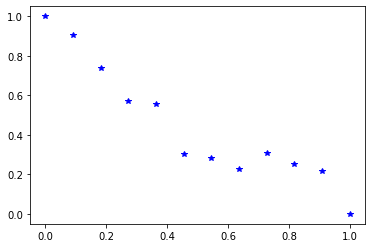

In [42]:
plt.plot(x_norm, y_norm, '*b')

In [43]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

In [58]:
#Ajusta polinomio de grado 1
b01 = np.zeros(2)    #beta_inicial
ajuste1 = opt.minimize(fun_obj, b01, args=(x_norm,y_norm,1))

#Ajusta polinomio de grado 2
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x_norm,y_norm,2))

#Ajusta polinomio de grado 3
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x_norm,y_norm,3))

#Ajusta polinomio de grado 4
b04 = np.zeros(5)
ajuste4 = opt.minimize(fun_obj, b04, args=(x_norm,y_norm,4))

#Ajusta polinomio de grado 5
b05 = np.zeros(6)
ajuste5 = opt.minimize(fun_obj, b05, args=(x_norm,y_norm,5))

#Ajusta polinomio de grado 6
b06 = np.zeros(7)
ajuste6 = opt.minimize(fun_obj, b06, args=(x_norm,y_norm,6))

In [59]:
ajuste1

      fun: 0.11584749894714287
 hess_inv: array([[ 0.1474359 , -0.21153846],
       [-0.21153846,  0.42307693]])
      jac: array([-1.86264515e-09,  1.02445483e-08])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.8872897 , -0.88228437])

In [60]:
ajuste2

      fun: 0.059732015912261904
 hess_inv: array([[ 0.27331361, -1.04237365,  0.83085234],
       [-1.04237365,  5.90682281, -5.48384029],
       [ 0.83085234, -5.48384029,  5.48392692]])
      jac: array([0.00000000e+00, 9.31322575e-10, 2.79396772e-09])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([ 1.00616629, -1.66686989,  0.78458552])

In [61]:
ajuste3

      fun: 0.04797610902652624
 hess_inv: array([[   0.36581417,   -2.60081556,    4.986423  ,   -2.79356783],
       [  -2.60081556,   30.70925086,  -70.71572197,   43.60508625],
       [   4.986423  ,  -70.71572197,  176.26045955, -113.8818698 ],
       [  -2.79356783,   43.60508625, -113.8818698 ,   75.83157991]])
      jac: array([-5.30853868e-07,  8.71717930e-07,  9.51811671e-07,  9.50880349e-07])
  message: 'Optimization terminated successfully.'
     nfev: 110
      nit: 20
     njev: 22
   status: 0
  success: True
        x: array([ 1.056034  , -2.43705251,  2.79592697, -1.34089429])

In [62]:
ajuste4

      fun: 0.01776580011467051
 hess_inv: array([[ 4.26911261e-01, -4.73384645e+00,  1.57123174e+01,
        -2.00358146e+01,  8.65790301e+00],
       [-4.73384645e+00,  1.01700798e+02, -4.25814509e+02,
         6.13619402e+02, -2.86021306e+02],
       [ 1.57123174e+01, -4.25814509e+02,  1.94675141e+03,
        -2.95026556e+03,  1.42138270e+03],
       [-2.00358146e+01,  6.13619402e+02, -2.95026556e+03,
         4.61366586e+03, -2.27193736e+03],
       [ 8.65790301e+00, -2.86021306e+02,  1.42138270e+03,
        -2.27193736e+03,  1.13675837e+03]])
      jac: array([ 2.03726813e-07, -3.55532393e-07, -1.97207555e-07, -2.82656401e-07,
       -4.02098522e-07])
  message: 'Optimization terminated successfully.'
     nfev: 210
      nit: 33
     njev: 35
   status: 0
  success: True
        x: array([ 0.9919394 , -0.34148839, -7.59379377, 15.24743279, -8.29417246])

In [63]:
ajuste5

      fun: 0.015567206894323006
 hess_inv: array([[ 4.65359404e-01, -7.17262094e+00,  3.53000098e+01,
        -7.46483162e+01,  7.08495505e+01, -2.48014119e+01],
       [-7.17262094e+00,  2.69839035e+02, -1.79474030e+03,
         4.45807462e+03, -4.68533528e+03,  1.76054539e+03],
       [ 3.53000098e+01, -1.79474030e+03,  1.31010191e+04,
        -3.42707423e+04,  3.72491747e+04, -1.43319112e+04],
       [-7.46483162e+01,  4.45807462e+03, -3.42707423e+04,
         9.25046831e+04, -1.02746677e+05,  4.01687337e+04],
       [ 7.08495505e+01, -4.68533528e+03,  3.72491747e+04,
        -1.02746677e+05,  1.15926366e+05, -4.58669142e+04],
       [-2.48014119e+01,  1.76054539e+03, -1.43319112e+04,
         4.01687337e+04, -4.58669142e+04,  1.83186048e+04]])
      jac: array([ 8.00122507e-07, -1.37661118e-06, -9.93837602e-07, -8.22590664e-07,
       -8.26199539e-07, -9.08621587e-07])
  message: 'Optimization terminated successfully.'
     nfev: 385
      nit: 53
     njev: 55
   status: 0
  succe

In [64]:
ajuste6

      fun: 0.01564396315939586
 hess_inv: array([[   0.39499541,   -3.36251834,    6.98937076,   -1.33649058,
          -4.54219862,   -2.02763524,    3.91236307],
       [  -3.36251834,   50.50264271, -131.10013703,   35.99241737,
          94.63994223,   38.3097146 ,  -85.7207117 ],
       [   6.98937076, -131.10013703,  376.7657479 , -121.26109657,
        -287.18686785, -109.68702317,  268.4304146 ],
       [  -1.33649058,   35.99241737, -121.26109657,   49.38340111,
         100.47031156,   34.5342758 ,  -99.50597595],
       [  -4.54219862,   94.63994223, -287.18686785,  100.47031156,
         226.99141051,   82.96968291, -216.20521694],
       [  -2.02763524,   38.3097146 , -109.68702317,   34.5342758 ,
          82.96968291,   32.81525559,  -77.56811468],
       [   3.91236307,  -85.7207117 ,  268.4304146 ,  -99.50597595,
        -216.20521694,  -77.56811468,  210.0969639 ]])
      jac: array([ 1.00210309e-06, -1.86148100e-06, -2.82889232e-06,  3.89502384e-06,
       -5.1739625

In [65]:
yhat1 = ajuste1.x.dot([x_norm**i for i in range(2)])*(max(y)-min(y)) + min(y)
yhat2 = ajuste2.x.dot([x_norm**i for i in range(3)])*(max(y)-min(y)) + min(y)
yhat3 = ajuste3.x.dot([x_norm**i for i in range(4)])*(max(y)-min(y)) + min(y)
yhat4 = ajuste4.x.dot([x_norm**i for i in range(5)])*(max(y)-min(y)) + min(y)
yhat5 = ajuste5.x.dot([x_norm**i for i in range(6)])*(max(y)-min(y)) + min(y)
yhat6 = ajuste6.x.dot([x_norm**i for i in range(7)])*(max(y)-min(y)) + min(y)

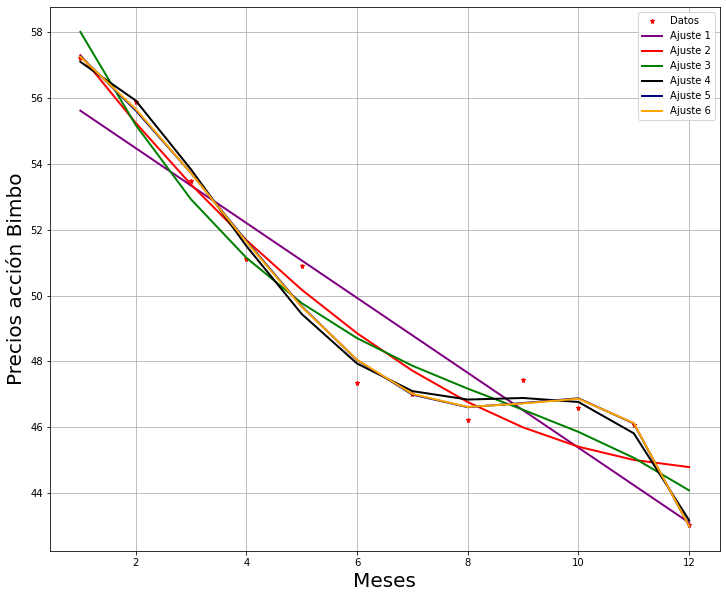

In [71]:
plt.figure(figsize=(12,10))

plt.plot(x, y, 'r*', ms=5, label='Datos')
plt.plot(x, yhat1, color = "purple", lw=2, label='Ajuste 1')
plt.plot(x, yhat2, color = "red", lw=2, label='Ajuste 2')
plt.plot(x, yhat3, color = "green", lw=2, label='Ajuste 3')
plt.plot(x, yhat4, color = "black", lw=2, label='Ajuste 4')
plt.plot(x, yhat5, color = "navy", lw=2, label='Ajuste 5')
plt.plot(x, yhat6, color = "orange", lw=2, label='Ajuste 6')

plt.xlabel('Meses',fontsize=20)
plt.ylabel('Precios acción Bimbo',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

[]

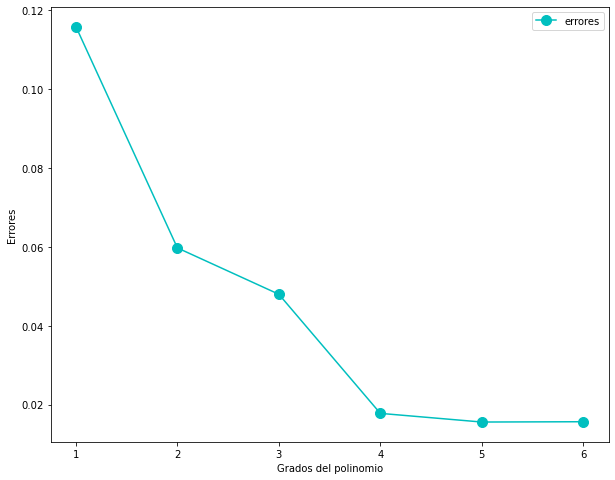

In [102]:
e = [ajuste1.fun, ajuste2.fun, ajuste3.fun, ajuste4.fun, ajuste5.fun, ajuste6.fun]
grados = [1, 2, 3 ,4, 5, 6]
plt.figure(figsize=(10,8))
plt.plot(grados, e, 'oc-', ms=10, label='errores')
plt.legend()
plt.xlabel('Grados del polinomio', fontsize=10)
plt.ylabel('Errores', fontsize=10)
plt.plot()

Utilizaremos el polinomio de grado 4 es el más indicado para hacer predicciones y se aproxima a los puntos de la gráfica 

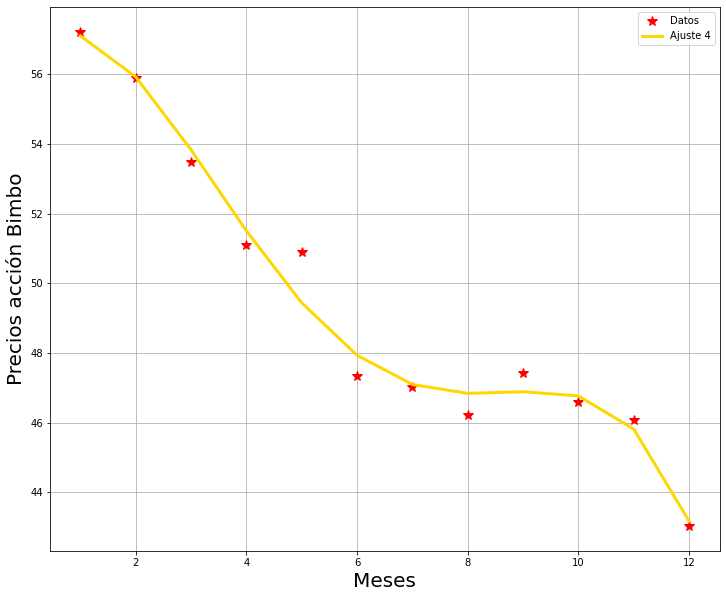

In [94]:
plt.figure(figsize=(12,10))

plt.plot(x, y, 'r*', ms=10, label='Datos')

plt.plot(x, yhat4, color = "gold", lw=3, label='Ajuste 4')

plt.xlabel('Meses',fontsize=20)
plt.ylabel('Precios acción Bimbo',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()